In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn import cross_validation
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.5)

import matplotlib.pyplot as plt
# this allows plots to appear directly in the notebook
%matplotlib inline

import sklearn.linear_model

In [2]:
df = pd.read_csv("yellow_tripdata_2015-01-1p.csv")
df.head()

/Users/rajashreebaradur/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,Duration,trip_duration,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,borough,neighborhood
0,1,1/29/15 9:00,1/29/15 9:20,0:20,20,1,1.90,-74.005905,40.735645,1,...,1,13.5,0.0,0.5,1.70,0.00,0.3,16.00,Manhattan,West Village
1,1,1/16/15 21:59,1/16/15 22:09,0:10,10,1,1.30,-73.988808,40.721855,1,...,1,8.0,0.5,0.5,1.85,0.00,0.3,11.15,Manhattan,Lower East Side
2,2,1/9/15 19:29,1/9/15 19:35,0:06,6,1,0.35,-73.980316,40.742496,1,...,2,5.0,1.0,0.5,0.00,0.00,0.3,6.80,Manhattan,Kips Bay
3,1,1/28/15 14:28,1/28/15 14:48,0:20,20,2,7.90,-73.873108,40.774086,1,...,1,24.0,0.0,0.5,0.00,5.33,0.3,30.13,Queens,LaGuardia Airport
4,2,1/22/15 7:08,1/22/15 7:14,0:06,6,1,1.29,-73.961906,40.763901,1,...,1,6.5,0.0,0.5,1.46,0.00,0.3,8.76,Manhattan,Upper East Side


In [3]:
df['trip_duration'] = df['trip_duration'].convert_objects(convert_numeric=True)

/Users/rajashreebaradur/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [4]:
df[['trip_duration']] = df[['trip_duration']].apply(pd.to_timedelta)

In [5]:
df[['trip_duration']] = df[['trip_duration']].apply(pd.to_numeric)

#df = df.drop(['Duration', 'trip_duration'], axis=1)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,Duration,trip_duration,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,borough,neighborhood
0,1,1/29/15 9:00,1/29/15 9:20,0:20,20.0,1,1.90,-74.005905,40.735645,1,...,1,13.5,0.0,0.5,1.70,0.00,0.3,16.00,Manhattan,West Village
1,1,1/16/15 21:59,1/16/15 22:09,0:10,10.0,1,1.30,-73.988808,40.721855,1,...,1,8.0,0.5,0.5,1.85,0.00,0.3,11.15,Manhattan,Lower East Side
2,2,1/9/15 19:29,1/9/15 19:35,0:06,6.0,1,0.35,-73.980316,40.742496,1,...,2,5.0,1.0,0.5,0.00,0.00,0.3,6.80,Manhattan,Kips Bay
3,1,1/28/15 14:28,1/28/15 14:48,0:20,20.0,2,7.90,-73.873108,40.774086,1,...,1,24.0,0.0,0.5,0.00,5.33,0.3,30.13,Queens,LaGuardia Airport
4,2,1/22/15 7:08,1/22/15 7:14,0:06,6.0,1,1.29,-73.961906,40.763901,1,...,1,6.5,0.0,0.5,1.46,0.00,0.3,8.76,Manhattan,Upper East Side


In [6]:
df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
Duration                  object
trip_duration            float64
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RateCodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
borough                   object
neighborhood              object
dtype: object

In [7]:
df['log_total_amount'] = df['total_amount'].apply(lambda x: np.log(x))
#df['log_tip_amount'] = df['tip_amount'].apply(lambda x: np.log(x))
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,Duration,trip_duration,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,borough,neighborhood,log_total_amount
0,1,1/29/15 9:00,1/29/15 9:20,0:20,20.0,1,1.90,-74.005905,40.735645,1,...,13.5,0.0,0.5,1.70,0.00,0.3,16.00,Manhattan,West Village,2.772589
1,1,1/16/15 21:59,1/16/15 22:09,0:10,10.0,1,1.30,-73.988808,40.721855,1,...,8.0,0.5,0.5,1.85,0.00,0.3,11.15,Manhattan,Lower East Side,2.411439
2,2,1/9/15 19:29,1/9/15 19:35,0:06,6.0,1,0.35,-73.980316,40.742496,1,...,5.0,1.0,0.5,0.00,0.00,0.3,6.80,Manhattan,Kips Bay,1.916923
3,1,1/28/15 14:28,1/28/15 14:48,0:20,20.0,2,7.90,-73.873108,40.774086,1,...,24.0,0.0,0.5,0.00,5.33,0.3,30.13,Queens,LaGuardia Airport,3.405521
4,2,1/22/15 7:08,1/22/15 7:14,0:06,6.0,1,1.29,-73.961906,40.763901,1,...,6.5,0.0,0.5,1.46,0.00,0.3,8.76,Manhattan,Upper East Side,2.170196


In [8]:
df.describe()

,VendorID,trip_duration,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,log_total_amount
count,127490.000000,127488.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,1.274530e+05
mean,1.520535,12.095005,1.681567,2.782500,-72.543729,39.962788,1.036921,-72.590987,39.989797,1.385293,11.900871,0.308217,0.497776,1.561781,0.243486,0.283276,14.811335,-inf
std,0.499580,8.592735,1.340551,3.403465,10.188356,5.612579,0.668754,10.020768,5.520446,0.498167,10.110382,0.361912,0.035273,3.353501,1.210873,0.068829,12.514612,NaN
min,1.000000,0.000000,0.000000,0.000000,-75.254013,0.000000,1.000000,-75.254036,0.000000,1.000000,-75.000000,-1.000000,-0.500000,-1.000000,0.000000,0.000000,-75.300000,-inf
25%,1.000000,6.000000,1.000000,1.000000,-73.991631,40.735592,1.000000,-73.991173,40.734398,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.160000,2.099244e+00
50%,2.000000,10.000000,1.000000,1.675000,-73.981575,40.753128,1.000000,-73.979752,40.753632,1.000000,9.000000,0.000000,0.500000,1.000000,0.000000,0.300000,11.160000,2.412336e+00
75%,2.000000,16.000000,2.000000,3.000000,-73.966629,40.767555,1.000000,-73.962555,40.768742,2.000000,13.500000,0.500000,0.500000,2.080000,0.000000,0.300000,16.300000,2.791165e+00
max,2.000000,59.000000,6.000000,99.900000,0.000000,41.570671,99.000000,0.000000,41.745903,4.000000,551.110000,7.000000,0.500000,700.000000,29.750000,0.300000,732.300000,6.596190e+00


In [9]:
def get_dt(x):
    return datetime.strptime(x, '%m/%d/%y %H:%M')

df['tpep_pickup_datetime'] = df.apply(lambda x: get_dt(x[1]), axis=1)
df['tpep_dropoff_datetime'] = df.apply(lambda x: get_dt(x[2]), axis=1)

df['tpep_pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek
#df['tpep_dropoff_dayofweek'] = df['tpep_dropoff_datetime'].dt.dayofweek

#df['tpep_pickup_time'] = df['tpep_pickup_time'].astype("int")
df['tpep_pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

#df['tpep_pickup_minuteofday'] = df['tpep_pickup_time'].apply(lambda x: x.hour) * 60 + df['tpep_pickup_time'].apply(lambda x: x.minute)
#df['tpep_dropoff_time'] = df['tpep_dropoff_datetime'].dt.time

In [10]:
df = df.drop(['store_and_fwd_flag',
              'pickup_longitude',
              'pickup_latitude',
              'tpep_pickup_datetime', 
              'tpep_dropoff_datetime',
              'dropoff_longitude',
              'dropoff_latitude'], axis=1)

In [11]:
df = df[df['RateCodeID'] == 1]
df = df[df['borough'] == 'Manhattan']
df = df[df['passenger_count']!= 0]
df = df[df['trip_distance']!= 0]
df = df[df['fare_amount'] > 0]
df = df[df['borough']!= '0']
df.replace([np.inf, -np.inf], np.nan)
df = df[df['log_total_amount'] > 0]
df.head()

,VendorID,Duration,trip_duration,passenger_count,trip_distance,RateCodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,borough,neighborhood,log_total_amount,tpep_pickup_dayofweek,tpep_pickup_hour
0,1,0:20,20.0,1,1.90,1,1,13.5,0.0,0.5,1.70,0.0,0.3,16.00,Manhattan,West Village,2.772589,3,9
1,1,0:10,10.0,1,1.30,1,1,8.0,0.5,0.5,1.85,0.0,0.3,11.15,Manhattan,Lower East Side,2.411439,4,21
2,2,0:06,6.0,1,0.35,1,2,5.0,1.0,0.5,0.00,0.0,0.3,6.80,Manhattan,Kips Bay,1.916923,4,19
4,2,0:06,6.0,1,1.29,1,1,6.5,0.0,0.5,1.46,0.0,0.3,8.76,Manhattan,Upper East Side,2.170196,3,7
5,1,0:17,17.0,1,1.30,1,1,11.5,0.0,0.5,2.45,0.0,0.3,14.75,Manhattan,Upper East Side,2.691243,1,13


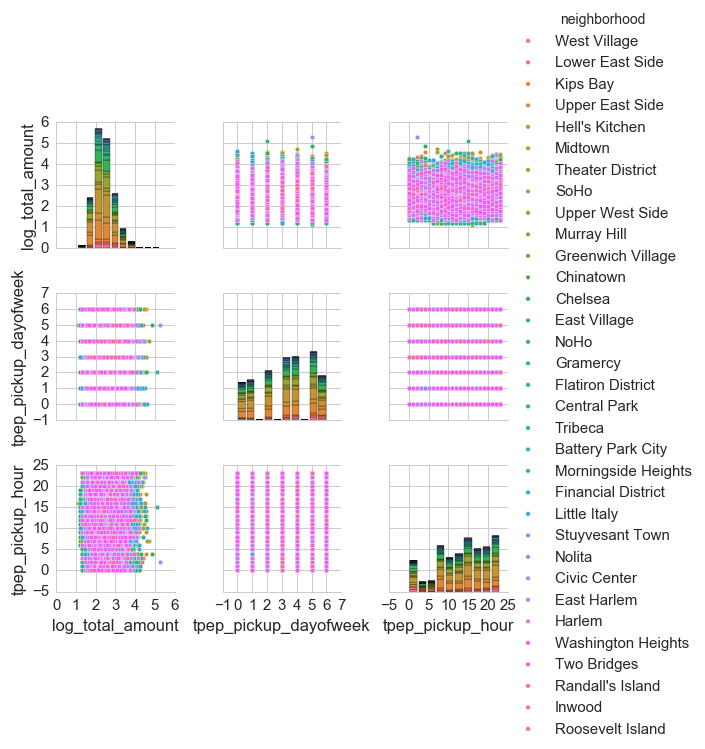

In [12]:
g = sns.pairplot(df, vars=['log_total_amount', 'tpep_pickup_dayofweek', 'tpep_pickup_hour'], hue="neighborhood")

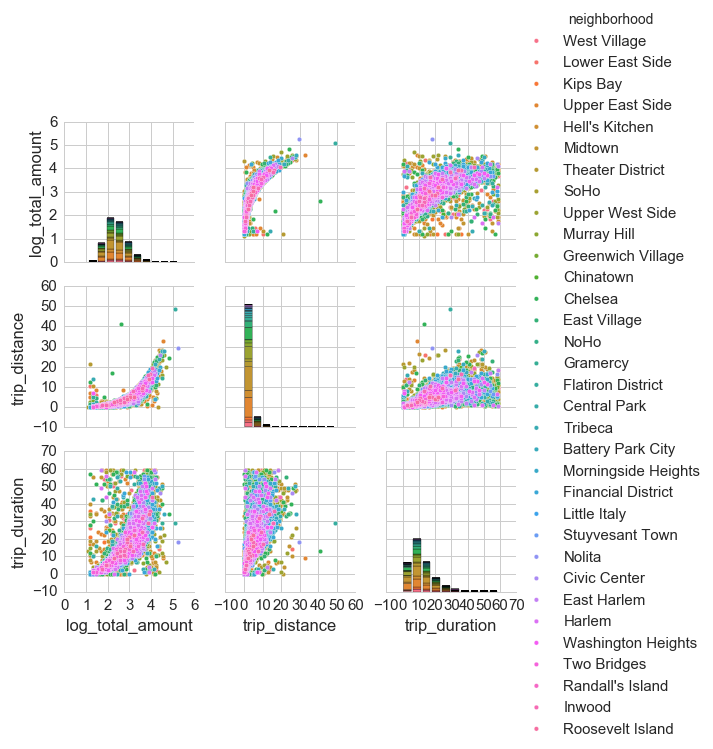

In [13]:
g = sns.pairplot(df, vars=['log_total_amount', 'trip_distance', 'trip_duration'], hue="neighborhood")

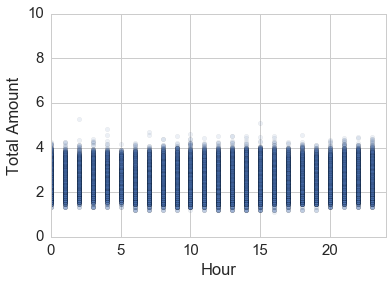

In [14]:
# visualize the relationship between the features and the response using scatterplots
df.plot(kind ='scatter', x='tpep_pickup_hour', y='log_total_amount', alpha=0.1)
plt.xlabel('Hour')
plt.ylabel('Total Amount')
plt.axis([0, 24, 0, 10])
plt.grid(True)
plt.show()

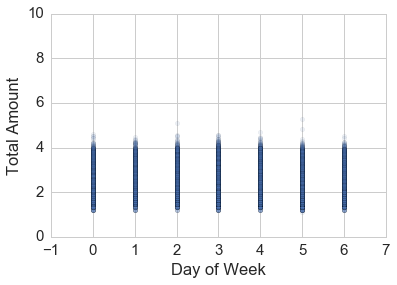

In [15]:
# visualize the relationship between the features and the response using scatterplots
df.plot(kind ='scatter', x='tpep_pickup_dayofweek', y='log_total_amount', alpha=0.1)
plt.xlabel('Day of Week')
plt.ylabel('Total Amount')
plt.axis([-1, 7, 0, 10])
plt.grid(True)
plt.show()

(0, 10)

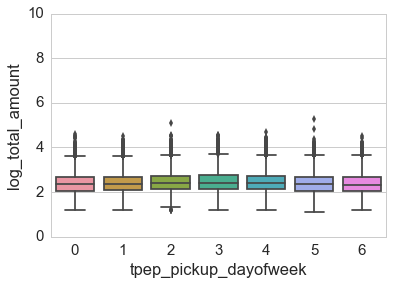

In [16]:
sns.boxplot(x='tpep_pickup_dayofweek', y='log_total_amount', data=df)
plt.ylim(0, 10)

(0, 10)

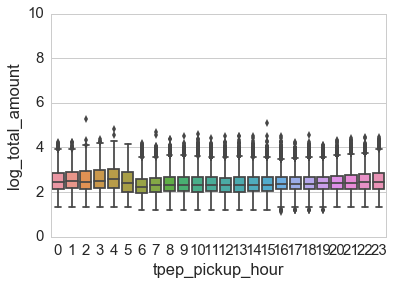

In [17]:
sns.boxplot(x='tpep_pickup_hour', y='log_total_amount', data=df)
plt.ylim(0, 10)

In [ ]:
#from sklearn import preprocessing

#le = preprocessing.LabelEncoder()
#to convert into numbers
#df.neighborhood = le.fit_transform(df.neighborhood)

In [18]:
df = df.join(pd.get_dummies(df['tpep_pickup_hour'], prefix='hour'))
df = df.join(pd.get_dummies(df['tpep_pickup_dayofweek'], prefix='week'))
df = df.join(pd.get_dummies(df['neighborhood'], prefix='n'))
#df = pd.get_dummies(df).astype(np.int8)

In [19]:
df = df.drop(['VendorID',
              'neighborhood',
              'RateCodeID',
              'tpep_pickup_dayofweek',
              'tpep_pickup_hour',
              'borough'], axis=1)

In [20]:
df.dtypes

Duration                  object
trip_duration            float64
passenger_count            int64
trip_distance            float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
log_total_amount         float64
hour_0                   float64
hour_1                   float64
hour_2                   float64
hour_3                   float64
hour_4                   float64
hour_5                   float64
hour_6                   float64
hour_7                   float64
hour_8                   float64
hour_9                   float64
hour_10                  float64
hour_11                  float64
hour_12                  float64
hour_13                  float64
hour_14                  float64
hour_15                  float64
hour_16                  float64
          

                       trip_duration  passenger_count  trip_distance  \
trip_duration               1.000000         0.012932       0.737443   
passenger_count             0.012932         1.000000       0.013355   
trip_distance               0.737443         0.013355       1.000000   
payment_type               -0.075840         0.012447      -0.073015   
fare_amount                 0.877855         0.012868       0.955220   
extra                       0.001406         0.004660       0.043392   
mta_tax                     0.000647         0.001030       0.000089   
tip_amount                  0.407481        -0.009920       0.461008   
tolls_amount                0.213565         0.005445       0.428788   
improvement_surcharge       0.026885         0.045664      -0.014681   
total_amount                0.842091         0.009260       0.939281   
log_total_amount            0.874181         0.009371       0.854448   
hour_0                      0.003676         0.008778       0.05

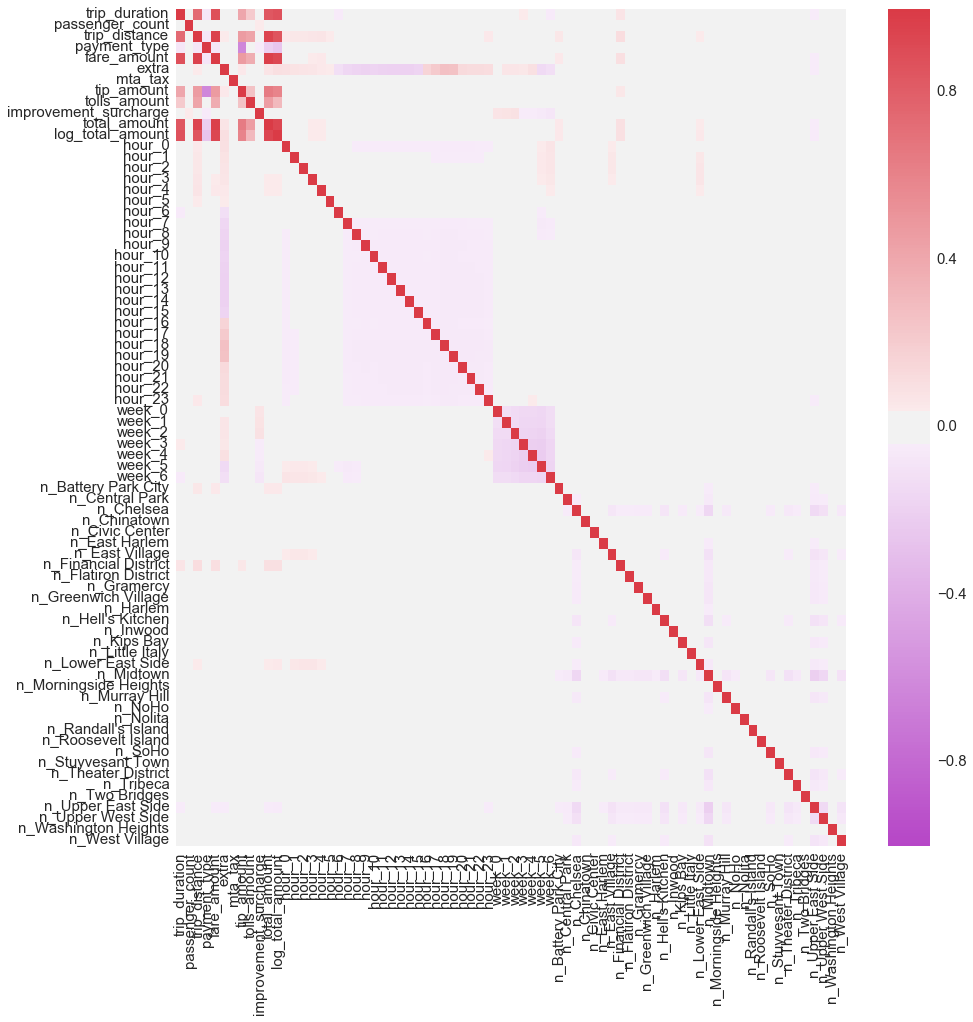

In [21]:
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(300, 10, as_cmap=True)

correlations = df.corr()
print correlations
print sns.heatmap(correlations, cmap=cmap, ax=ax)

In [22]:
import statsmodels.formula.api as smf

y = df['total_amount']
log_y = np.log10(y+1)
lm = smf.ols(formula=' log_y ~ hour_0 + hour_1 + hour_2 + hour_3 + hour_4 + hour_5 + hour_6 + hour_7 + hour_8 + hour_9 + hour_10 + hour_11 + hour_12 + hour_13 + hour_14 + hour_15 + hour_18 + hour_20 + hour_21 + hour_22 + hour_23 ' , data=df).fit()
#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_y   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     91.03
Date:                Sat, 30 Jul 2016   Prob (F-statistic):               0.00
Time:                        06:53:25   Log-Likelihood:                 28110.
No. Observations:              114539   AIC:                        -5.618e+04
Df Residuals:                  114517   BIC:                        -5.596e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.0919      0.001    782.027      0.000         1.089     1.095
hour_0         0.0400      0.003     12.298      0.000         0.034     0.046
hour_1         0.0463      0.004     12.642      0.000         0.039     0.053
hour_2         0.0470      0.004     11.469      0.000         0.039     0.055
hour_3         0.0641      0.005     13.522      0.000         0.055     0.073
hour_4         0.0771      0.006     13.724      0.000         0.066     0.088
hour_5         0.0323      0.006      5.329      0.000         0.020     0.044
hour_6        -0.0362      0.004     -8.558      0.000        -0.044    -0.028
hour_7        -0.0240      0.003     -7.280      0.000        -0.030    -0.018
hour_8        -0.0117      0.003     -3.876      0.000        -0.018    -0.006
hour_9        -0.0131      0.003     -4.477      0.000        -0.019    -0.007
hour_10       -0.0193      0.003     -6.486      0.000        -0.025    -0.013
hour_11       -0.0185      0.003     -6.372      0.000        -0.024    -0.013
hour_12       -0.0248      0.003     -8.718      0.000        -0.030    -0.019
hour_13       -0.0199      0.003     -6.990      0.000        -0.025    -0.014
hour_14       -0.0183      0.003     -6.433      0.000        -0.024    -0.013
hour_15       -0.0128      0.003     -4.476      0.000        -0.018    -0.007
hour_18        0.0067      0.003      2.600      0.009         0.002     0.012
hour_20        0.0102      0.003      3.761      0.000         0.005     0.016
hour_21        0.0183      0.003      6.635      0.000         0.013     0.024
hour_22        0.0306      0.003     10.966      0.000         0.025     0.036
hour_23        0.0367      0.003     12.252      0.000         0.031     0.043
==============================================================================
Omnibus:                     7674.219   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9415.216
Skew:                           0.659   Prob(JB):                         0.00
Kurtosis:                       3.487   Cond. No.                         13.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
# Set target variable name
target = 'total_amount'

# Set X and y
X = df.drop([target, 'trip_duration','trip_distance','log_total_amount','hour_16', 'hour_17','hour_19','week_0','week_1','week_1','week_2','week_3','week_4','week_5','week_6','total_amount', 'Duration', 'tip_amount', 'fare_amount', 'extra', 'tolls_amount','payment_type', 'improvement_surcharge', 'passenger_count', 'mta_tax'], axis=1)
y = df[target]


# Create separate training and test sets with 60/40 train/test split
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)


# check size of training set
print X_train.shape, y_train.shape

# check size of test set
print X_test.shape, y_test.shape

(68723, 54) (68723,)
(45816, 54) (45816,)


P Values: [  2.72101231e-022   1.76851741e-019   6.60067257e-019   2.67148708e-025
   9.06429313e-041   2.76887656e-010   6.38114782e-006   7.66501974e-009
   6.43635660e-003   2.55356243e-004   5.18175083e-009   8.18297734e-009
   6.49257125e-015   4.29809101e-007   6.52895135e-008   2.96943462e-005
   1.74474930e-001   1.65786576e-001   1.54510044e-005   8.94189816e-013
   2.20159645e-022   4.64381319e-034   4.23016599e-004   4.81644902e-002
   2.86431632e-005   3.36457976e-005   3.24670621e-001   3.03159198e-004
   7.27388941e-143   7.26099793e-002   4.67529995e-003   8.38269367e-001
   4.49252288e-006   5.56505884e-001   1.98489812e-003   1.98839805e-004
   1.69811589e-001   3.93039738e-021   9.91854826e-006   1.71336713e-004
   2.26291675e-002   8.97508895e-001   2.17088682e-007   9.46741502e-001
   2.81248259e-006   5.96859767e-005   2.51891303e-001   2.86129071e-002
   9.03643540e-017   9.87591186e-001   2.61903697e-029   4.49250814e-015
   3.73585848e-006   5.93912340e-002]
Coe

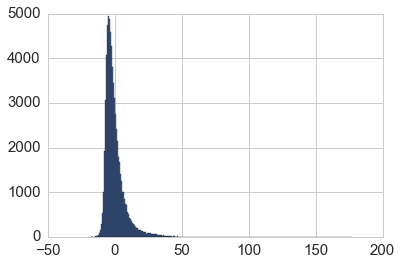

In [81]:
from sklearn import feature_selection, linear_model

def get_linear_model_metrics(X, y, algo):
    # get the pvalue of X given y. Ignore f-stat for now.
    pvals = feature_selection.f_regression(X, y)[1]
    # start with an empty linear regression object
    # .fit() runs the linear regression function on X and y
    algo.fit(X,y)
    residuals = (y-algo.predict(X)).values

    # print the necessary values
    print 'P Values:', pvals
    print 'Coefficients:', algo.coef_
    print 'y-intercept:', algo.intercept_
    print 'R-Squared:', algo.score(X,y)
    #plot hist of errors
    plt.figure()
    plt.hist(residuals, bins=np.ceil(np.sqrt(len(y))))
    # keep the model
    return algo

lm = linear_model.LinearRegression(fit_intercept=False)
lm = get_linear_model_metrics(X_train, y_train, lm)

In [82]:
kf = cross_validation.KFold(len(X_train), n_folds=5, shuffle=True)

In [83]:
from sklearn import metrics

mse_values = []
scores = []
n= 0
print "~~~~ CROSS VALIDATION each fold ~~~~"
for train_index, test_index in kf:
    lm = linear_model.LinearRegression().fit(X_train.iloc[train_index], y_train.iloc[train_index])
    mse_values.append(metrics.mean_squared_error(y_train.iloc[test_index], lm.predict(X_train.iloc[test_index])))
    scores.append(lm.score(X_train, y_train))
    n+=1
    print 'Model', n
    print 'MSE:', mse_values[n-1]
    print 'R2:', scores[n-1]


print "~~~~ SUMMARY OF CROSS VALIDATION ~~~~"
print 'Mean of MSE for all folds:', np.mean(mse_values)
print 'Mean of R2 for all folds:', np.mean(scores)

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 54.0630392263
R2: 0.0321277695453
Model 2
MSE: 53.3866575132
R2: 0.0321194108054
Model 3
MSE: 51.2188648883
R2: 0.0321585465632
Model 4
MSE: 55.8809583551
R2: 0.0319802931772
Model 5
MSE: 8.7629087392e+19
R2: -3.17084454759e+17
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 1.75258174784e+19
Mean of R2 for all folds: -6.34168909517e+16


In [84]:
lm = linear_model.LinearRegression().fit(X_train, y_train)
print "~~~~ Single Model ~~~~"
print 'MSE of single model:', metrics.mean_squared_error(y_train, lm.predict(X_train))
print 'R2: ', lm.score(X_train, y_train)

~~~~ Single Model ~~~~
MSE of single model: 53.4850513198
R2:  0.0322837310903


In [85]:
# fit linear regression using no regularization (OLS)
lm = linear_model.LinearRegression().fit(X_train, y_train)
print "~~~ No regularization (OLS) ~~~"
print 'OLS MSE: ', metrics.mean_squared_error(y_train, lm.predict(X_train))
print 'OLS R2:', lm.score(X_train, y_train)

# fit linear regression using L1 regularization (Lasso)
lm = linear_model.Lasso().fit(X_train, y_train)
print "~~~ L1 regularization (Lasso) ~~~"
print 'Lasso MSE: ', metrics.mean_squared_error(y_train, lm.predict(X_train))
print 'Lasso R2:', lm.score(X_train, y_train)

# fit linear regression using L2 regularization (Ridge)
lm = linear_model.Ridge().fit(X_train, y_train)
print "~~~ L2 regularization (Ridge) ~~~"
print 'Ridge MSE: ', metrics.mean_squared_error(y_train, lm.predict(X_train))
print 'Ridge R2:', lm.score(X_train, y_train)

~~~ No regularization (OLS) ~~~
OLS MSE:  53.4850513198
OLS R2: 0.0322837310903
~~~ L1 regularization (Lasso) ~~~
Lasso MSE:  55.2693522246
Lasso R2: 0.0
~~~ L2 regularization (Ridge) ~~~
Ridge MSE:  53.4863825794
Ridge R2: 0.032259644331


In [86]:
alphas = np.logspace(-10, 10, 21)
for a in alphas:
    print 'Alpha:', a
    lm = linear_model.Ridge(alpha=a)
    lm.fit(X_train, y_train)
    print metrics.mean_squared_error(y_train, lm.predict(X_train))

Alpha: 1e-10
53.4845531311
Alpha: 1e-09
53.4845531311
Alpha: 1e-08
53.4845531311
Alpha: 1e-07
53.4845531311
Alpha: 1e-06
53.4845531311
Alpha: 1e-05
53.4845531311
Alpha: 0.0001
53.4845531311
Alpha: 0.001
53.4845531351
Alpha: 0.01
53.4845535292
Alpha: 0.1
53.4845896976
Alpha: 1.0
53.4863825794
Alpha: 10.0
53.4972842238
Alpha: 100.0
53.5224028364
Alpha: 1000.0
53.8336602809
Alpha: 10000.0
54.7424147307
Alpha: 100000.0
55.1915220279
Alpha: 1000000.0
55.261131857
Alpha: 10000000.0
55.2685254634
Alpha: 100000000.0
55.2692695008
Alpha: 1000000000.0
55.2693439517
Alpha: 10000000000.0
55.2693513973


In [87]:
# import grid search
from sklearn import grid_search

# pick range of values to search with
alphas = np.logspace(-10, 10, 21)

# use grid search CV to find best value
gs = grid_search.GridSearchCV(
    estimator=linear_model.Ridge(),
    param_grid={'alpha': alphas},
    scoring='mean_squared_error')
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-10,   1.00000e-09,   1.00000e-08,   1.00000e-07,
         1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04,   1.00000e+05,
         1.00000e+06,   1.00000e+07,   1.00000e+08,   1.00000e+09,
         1.00000e+10])},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=0)

In [88]:
print gs.best_estimator_

Ridge(alpha=100.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


In [89]:
print gs.grid_scores_

[mean: -53.67326, std: 0.85400, params: {'alpha': 1e-10}, mean: -53.67327, std: 0.85399, params: {'alpha': 1.0000000000000001e-09}, mean: -53.67327, std: 0.85399, params: {'alpha': 1e-08}, mean: -53.67327, std: 0.85399, params: {'alpha': 9.9999999999999995e-08}, mean: -53.67327, std: 0.85399, params: {'alpha': 9.9999999999999995e-07}, mean: -53.67327, std: 0.85399, params: {'alpha': 1.0000000000000001e-05}, mean: -53.67327, std: 0.85399, params: {'alpha': 0.0001}, mean: -53.67326, std: 0.85399, params: {'alpha': 0.001}, mean: -53.67323, std: 0.85401, params: {'alpha': 0.01}, mean: -53.67292, std: 0.85416, params: {'alpha': 0.10000000000000001}, mean: -53.66999, std: 0.85574, params: {'alpha': 1.0}, mean: -53.65369, std: 0.86677, params: {'alpha': 10.0}, mean: -53.64829, std: 0.89652, params: {'alpha': 100.0}, mean: -54.02779, std: 0.92008, params: {'alpha': 1000.0}, mean: -54.88609, std: 0.90880, params: {'alpha': 10000.0}, mean: -55.21862, std: 0.90441, params: {'alpha': 100000.0}, me

In [90]:
print gs.best_params_

{'alpha': 100.0}


In [91]:
num_to_approach, start, steps, optimized = 6.2, 0., [-1, 1], False
while not optimized:
    current_distance = num_to_approach - start
    got_better = False
    next_steps = [start + i for i in steps]
    for n in next_steps:
        distance = np.abs(num_to_approach - n)
        if distance < current_distance:
            got_better = True
            print distance, 'is better than', current_distance
            current_distance = distance
            start = n
    if got_better:
        print 'found better solution! using', current_distance
        a += 1
    else:
        optimized = True
        print start, 'is closest to', num_to_approach

5.2 is better than 6.2
found better solution! using 5.2
4.2 is better than 5.2
found better solution! using 4.2
3.2 is better than 4.2
found better solution! using 3.2
2.2 is better than 3.2
found better solution! using 2.2
1.2 is better than 2.2
found better solution! using 1.2
0.2 is better than 1.2
found better solution! using 0.2
6.0 is closest to 6.2


In [92]:
num_to_approach, start, steps, optimized = 6.2, 0., [-1, 1], False
n_iter = 0
while not optimized:
    if n_iter > 3:
        print 'stopping iterations'
        break
    n_iter += 1
    current_distance = num_to_approach - start
    got_better = False
    next_steps = [start + i for i in steps]
    for n in next_steps:
        distance = np.abs(num_to_approach - n)
        if distance < current_distance:
            got_better = True
            print distance, 'is better than', current_distance
            current_distance = distance
            start = n
    if got_better:
        print 'found better solution! using', current_distance
        a += 1
    else:
        optimized = True
        print start, 'is closest to', num_to_approach

5.2 is better than 6.2
found better solution! using 5.2
4.2 is better than 5.2
found better solution! using 4.2
3.2 is better than 4.2
found better solution! using 3.2
2.2 is better than 3.2
found better solution! using 2.2
stopping iterations


In [93]:
lm = linear_model.SGDRegressor()
lm.fit(X_train, y_train)
print "Gradient Descent MSE:", metrics.mean_squared_error(y_train, lm.predict(X_train))
print "Gradient Descent R2:", lm.score(X_train, y_train)
print "Gradient Descent MSE:", metrics.mean_squared_error(y_test, lm.predict(X_test))
print "Gradient Descent R2:", lm.score(X_test, y_test)

Gradient Descent MSE: 53.5432068462
Gradient Descent R2: 0.0312315109348
Gradient Descent MSE: 55.1908732208
Gradient Descent R2: 0.0319736282221


Axes(0.125,0.125;0.775x0.775)


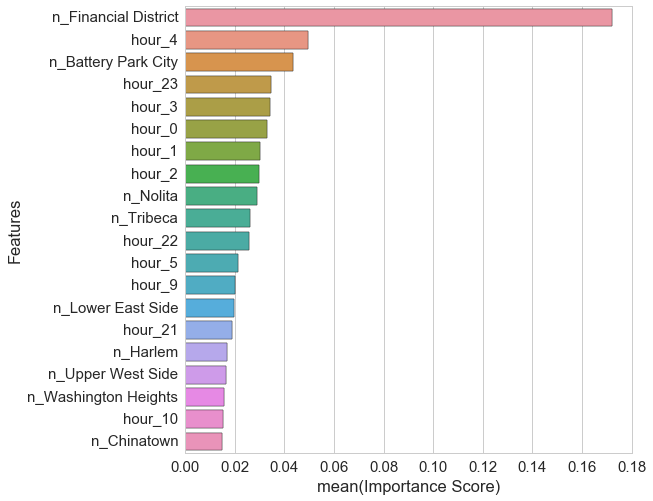

In [94]:
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# random forest code
rf = RandomForestRegressor(n_estimators=100, min_samples_split=2, n_jobs=-1)
# fit the training data
#print('fitting the model')
rf.fit(X_train, y_train)

# Plot feature importances
feature_names = X.columns
feature_importances = rf.feature_importances_
feature_dict = dict(zip(feature_names, feature_importances))

features_df = pd.DataFrame(feature_dict.items(), columns=['Features', 'Importance Score'])
features_df.sort_values('Importance Score', inplace=True, ascending=False)

f, ax = plt.subplots(figsize=(8, 8))
print sns.barplot(y='Features', x='Importance Score', data=features_df, ax=ax)
sns.barplot(y='Features', x='Importance Score', data=features_df.head(20))

In [95]:
new_test = X.sample(1)

print new_test

pred_for_new_test = lm.predict(new_test)

print pred_for_new_test

    hour_0  hour_1  hour_2  hour_3  hour_4  hour_5  hour_6  hour_7  hour_8  \
53     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

    hour_9       ...        n_Roosevelt Island  n_SoHo  n_Stuyvesant Town  \
53     0.0       ...                       0.0     0.0                0.0   

    n_Theater District  n_Tribeca  n_Two Bridges  n_Upper East Side  \
53                 0.0        0.0            0.0                0.0   

    n_Upper West Side  n_Washington Heights  n_West Village  
53                1.0                   0.0             0.0  

[1 rows x 54 columns]
[ 13.58151668]


In [97]:
new_test = X.sample(1)

print new_test

pred_for_new_test = rf.predict(new_test)

print pred_for_new_test

       hour_0  hour_1  hour_2  hour_3  hour_4  hour_5  hour_6  hour_7  hour_8  \
91187     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       hour_9       ...        n_Roosevelt Island  n_SoHo  n_Stuyvesant Town  \
91187     0.0       ...                       0.0     0.0                0.0   

       n_Theater District  n_Tribeca  n_Two Bridges  n_Upper East Side  \
91187                 0.0        0.0            0.0                0.0   

       n_Upper West Side  n_Washington Heights  n_West Village  
91187                1.0                   0.0             0.0  

[1 rows x 54 columns]
[ 11.85036459]
